In [41]:
_year='2024'

In [43]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\'
filename = '출퇴근대여반납차이_' + _year + '.parquet'
start_time = time.time()
df = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df.head(5)

read_parquet time : 0.012964487075805664


,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
0,00003,NaN,172.0,NaN,6.0,None,None,NaN,NaN
1,00005,NaN,15.0,NaN,5.0,None,None,NaN,NaN
2,00102,1008.0,1118.0,2088.0,2461.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
3,00103,362.0,585.0,1415.0,1937.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
4,00104,458.0,929.0,1227.0,1062.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2764 non-null   object 
 1   출근대여수   2758 non-null   float64
 2   출근반납수   2757 non-null   float64
 3   퇴근대여수   2758 non-null   float64
 4   퇴근반납수   2761 non-null   float64
 5   대여소명    2758 non-null   object 
 6   상세주소    2758 non-null   object 
 7   위도      2758 non-null   float64
 8   경도      2758 non-null   float64
dtypes: float64(6), object(3)
memory usage: 194.5+ KB


In [47]:
df.shape

(2764, 9)

In [49]:
df.isnull().sum()

대여소번호    0
출근대여수    6
출근반납수    7
퇴근대여수    6
퇴근반납수    3
대여소명     6
상세주소     6
위도       6
경도       6
dtype: int64

### null 값이 있는 모든 행 확인하기

In [51]:
df[df.isnull().any(axis=1)]

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
0,00003,NaN,172.0,NaN,6.0,None,None,NaN,NaN
1,00005,NaN,15.0,NaN,5.0,None,None,NaN,NaN
633,00937,18.0,NaN,53.0,97.0,상림마을 롯데캐슬2단지 옆,서울특별시 은평구 진관동 30-23 상림마을 롯데캐슬2단지 옆,37.645851,126.923798
1222,01816,1.0,NaN,NaN,NaN,금천폭포공원 앞,서울특별시 금천구 시흥대로38길 61,37.446861,126.903831
1903,03527,36.0,NaN,34.0,11.0,왕십리 자이아파트(101동 앞),서울특별시 성동구 난계로 100 왕십리 자이아파트 103동 인근,37.561790,127.024391
1913,03538,NaN,114.0,97.0,4.0,서울숲 IT캐슬,서울특별시 성동구 광나루로 130 서울숲 IT캐슬,37.550892,127.044762
2286,04314,11.0,NaN,18.0,4.0,탑성마을 버스정거장 옆,염곡동 189-19,37.459167,127.055443
2463,04623,7.0,NaN,71.0,51.0,라인프랜즈이태원점 앞,서울특별시 용산구 이태원로 177 6호선 이태원역,37.534531,126.996193
2760,09980,1.0,NaN,4.0,1.0,None,None,NaN,NaN
2761,09997,NaN,52.0,NaN,NaN,None,None,NaN,NaN


### 대여소명, 위경도 null값이 데이터 행 삭제하기

In [53]:
df = df.dropna(subset=['대여소명'])
df 

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
2,00102,1008.0,1118.0,2088.0,2461.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
3,00103,362.0,585.0,1415.0,1937.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
4,00104,458.0,929.0,1227.0,1062.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986
5,00105,177.0,218.0,626.0,607.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825
6,00106,570.0,597.0,1642.0,1971.0,합정역 7번출구 앞,서울특별시 마포구 독막로 4,37.548645,126.912826
...,...,...,...,...,...,...,...,...,...
2755,06058,380.0,305.0,916.0,1098.0,서울도시건축전시관 옆,중구 세종대로 101,37.566540,126.976845
2756,06059,54.0,53.0,63.0,58.0,덕수중학교,중구 인현동2가 240-2,37.564392,126.997299
2757,06171,411.0,224.0,765.0,961.0,월드빌딩 앞,화곡동 1066-8,37.540981,126.837433
2758,06172,365.0,169.0,145.0,311.0,가양5단지아파트,강서구 가양동1481,37.564480,126.854645


In [55]:
df[df.isnull().any(axis=1)]

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
633,00937,18.0,NaN,53.0,97.0,상림마을 롯데캐슬2단지 옆,서울특별시 은평구 진관동 30-23 상림마을 롯데캐슬2단지 옆,37.645851,126.923798
1222,01816,1.0,NaN,NaN,NaN,금천폭포공원 앞,서울특별시 금천구 시흥대로38길 61,37.446861,126.903831
1903,03527,36.0,NaN,34.0,11.0,왕십리 자이아파트(101동 앞),서울특별시 성동구 난계로 100 왕십리 자이아파트 103동 인근,37.561790,127.024391
1913,03538,NaN,114.0,97.0,4.0,서울숲 IT캐슬,서울특별시 성동구 광나루로 130 서울숲 IT캐슬,37.550892,127.044762
2286,04314,11.0,NaN,18.0,4.0,탑성마을 버스정거장 옆,염곡동 189-19,37.459167,127.055443
2463,04623,7.0,NaN,71.0,51.0,라인프랜즈이태원점 앞,서울특별시 용산구 이태원로 177 6호선 이태원역,37.534531,126.996193


### 인덱스 1222번 삭제하기 
- null값이 많고, 출근대여수 1회라서 의미없다고 판단

In [57]:
df.drop(1222, inplace=True)

In [59]:
df[df.isnull().any(axis=1)]

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
633,00937,18.0,NaN,53.0,97.0,상림마을 롯데캐슬2단지 옆,서울특별시 은평구 진관동 30-23 상림마을 롯데캐슬2단지 옆,37.645851,126.923798
1903,03527,36.0,NaN,34.0,11.0,왕십리 자이아파트(101동 앞),서울특별시 성동구 난계로 100 왕십리 자이아파트 103동 인근,37.561790,127.024391
1913,03538,NaN,114.0,97.0,4.0,서울숲 IT캐슬,서울특별시 성동구 광나루로 130 서울숲 IT캐슬,37.550892,127.044762
2286,04314,11.0,NaN,18.0,4.0,탑성마을 버스정거장 옆,염곡동 189-19,37.459167,127.055443
2463,04623,7.0,NaN,71.0,51.0,라인프랜즈이태원점 앞,서울특별시 용산구 이태원로 177 6호선 이태원역,37.534531,126.996193


### 출근대여수, 퇴근대여수 중 하나라도 null값인 데이터 삭제

In [61]:
df.dropna(inplace=True)

In [63]:
df.isnull().sum()

대여소번호    0
출근대여수    0
출근반납수    0
퇴근대여수    0
퇴근반납수    0
대여소명     0
상세주소     0
위도       0
경도       0
dtype: int64

In [65]:
df.shape

(2752, 9)

## 퇴근반납수 - 출근대여수 높은 대여소 추출하기

In [73]:
df['퇴근반납수-출근대여수'] = df['퇴근반납수'] - df['출근대여수']
df

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도,퇴근반납수-출근대여수
2,00102,1008.0,1118.0,2088.0,2461.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,1453.0
3,00103,362.0,585.0,1415.0,1937.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,1575.0
4,00104,458.0,929.0,1227.0,1062.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,604.0
5,00105,177.0,218.0,626.0,607.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,430.0
6,00106,570.0,597.0,1642.0,1971.0,합정역 7번출구 앞,서울특별시 마포구 독막로 4,37.548645,126.912826,1401.0
...,...,...,...,...,...,...,...,...,...,...
2755,06058,380.0,305.0,916.0,1098.0,서울도시건축전시관 옆,중구 세종대로 101,37.566540,126.976845,718.0
2756,06059,54.0,53.0,63.0,58.0,덕수중학교,중구 인현동2가 240-2,37.564392,126.997299,4.0
2757,06171,411.0,224.0,765.0,961.0,월드빌딩 앞,화곡동 1066-8,37.540981,126.837433,550.0
2758,06172,365.0,169.0,145.0,311.0,가양5단지아파트,강서구 가양동1481,37.564480,126.854645,-54.0


In [85]:
df['출근반납수-퇴근대여수'] = df['출근반납수'] - df['퇴근대여수']
df

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도,퇴근반납수-출근대여수,출근반납수-퇴근대여수
2,00102,1008.0,1118.0,2088.0,2461.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,1453.0,-970.0
3,00103,362.0,585.0,1415.0,1937.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,1575.0,-830.0
4,00104,458.0,929.0,1227.0,1062.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,604.0,-298.0
5,00105,177.0,218.0,626.0,607.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,430.0,-408.0
6,00106,570.0,597.0,1642.0,1971.0,합정역 7번출구 앞,서울특별시 마포구 독막로 4,37.548645,126.912826,1401.0,-1045.0
...,...,...,...,...,...,...,...,...,...,...,...
2755,06058,380.0,305.0,916.0,1098.0,서울도시건축전시관 옆,중구 세종대로 101,37.566540,126.976845,718.0,-611.0
2756,06059,54.0,53.0,63.0,58.0,덕수중학교,중구 인현동2가 240-2,37.564392,126.997299,4.0,-10.0
2757,06171,411.0,224.0,765.0,961.0,월드빌딩 앞,화곡동 1066-8,37.540981,126.837433,550.0,-541.0
2758,06172,365.0,169.0,145.0,311.0,가양5단지아파트,강서구 가양동1481,37.564480,126.854645,-54.0,24.0


In [81]:
top_20 = df.nlargest(20, '퇴근반납수-출근대여수')
top_20

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도,퇴근반납수-출근대여수
1744,02728,7312.0,6883.0,7978.0,15134.0,마곡나루역 3번 출구,강서구 마곡동 372-23,37.565804,126.828079,7822.0
793,01153,3526.0,2975.0,6535.0,10677.0,"발산역 1번, 9번 인근 대여소",서울특별시 강서구 공항대로 281,37.558949,126.837174,7151.0
2248,04217,1427.0,828.0,4221.0,6193.0,한강공원 망원나들목,마포구 망원동 462-8,37.555576,126.896889,4766.0
2737,05858,4196.0,2836.0,2868.0,8212.0,영등포역5번출구,경인로 846,37.516693,126.908073,4016.0
518,00765,1501.0,2752.0,3764.0,5409.0,오목교역 3번출구,서울특별시 양천구 목동동로 270,37.524776,126.875481,3908.0
2417,04565,1126.0,2287.0,4917.0,4735.0,영등포 신세계백화점,영등포구 영등포4가 442-6,37.518036,126.903648,3609.0
90,00207,2610.0,1083.0,5581.0,5935.0,여의나루역 1번출구 앞,서울특별시 영등포구 여의동로 지하343,37.527157,126.931900,3325.0
330,00502,3231.0,5685.0,6526.0,6502.0,뚝섬유원지역 1번출구 앞,서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞,37.531860,127.067192,3271.0
539,00792,797.0,2984.0,4424.0,4018.0,목동트라팰리스 웨스턴에비뉴,오목로299(이마트 출입구측),37.525372,126.870926,3221.0
1390,02102,1705.0,2340.0,3459.0,4850.0,봉림교 교통섬,서울특별시 관악구 관천로 52,37.484085,126.926888,3145.0


KeyError: '대여소'

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\sit

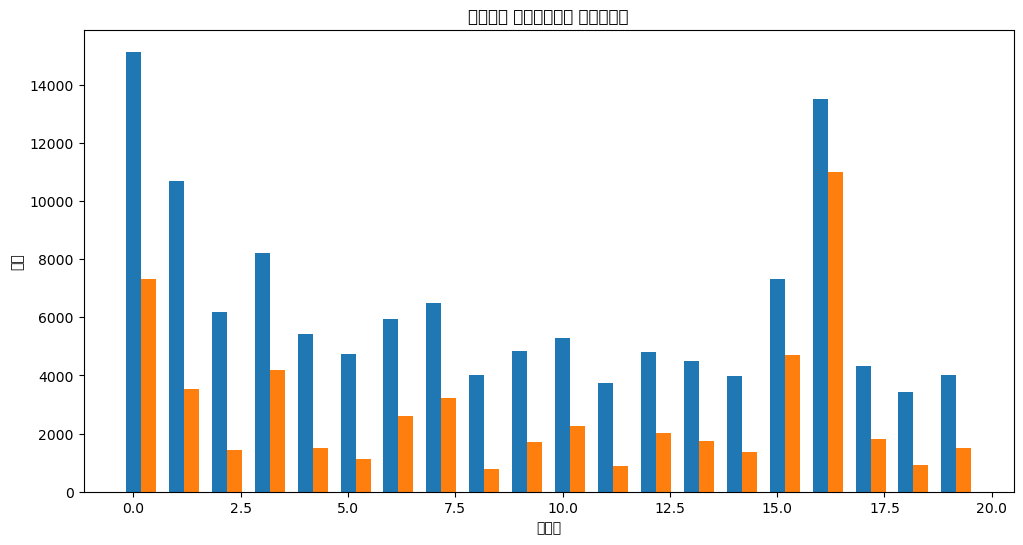

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
x = range(len(top_20))
width = 0.35

plt.bar(x, top_20['퇴근반납수'], width, label='퇴근반납수')
plt.bar([i + width for i in x], top_20['출근대여수'], width, label='출근대여수')

plt.xlabel('대여소')
plt.ylabel('수량')
plt.title('대여소별 퇴근반납수와 출근대여수')
plt.xticks([i + width/2 for i in x], top_20['대여소'])
plt.legend()

plt.tight_layout()
plt.show()

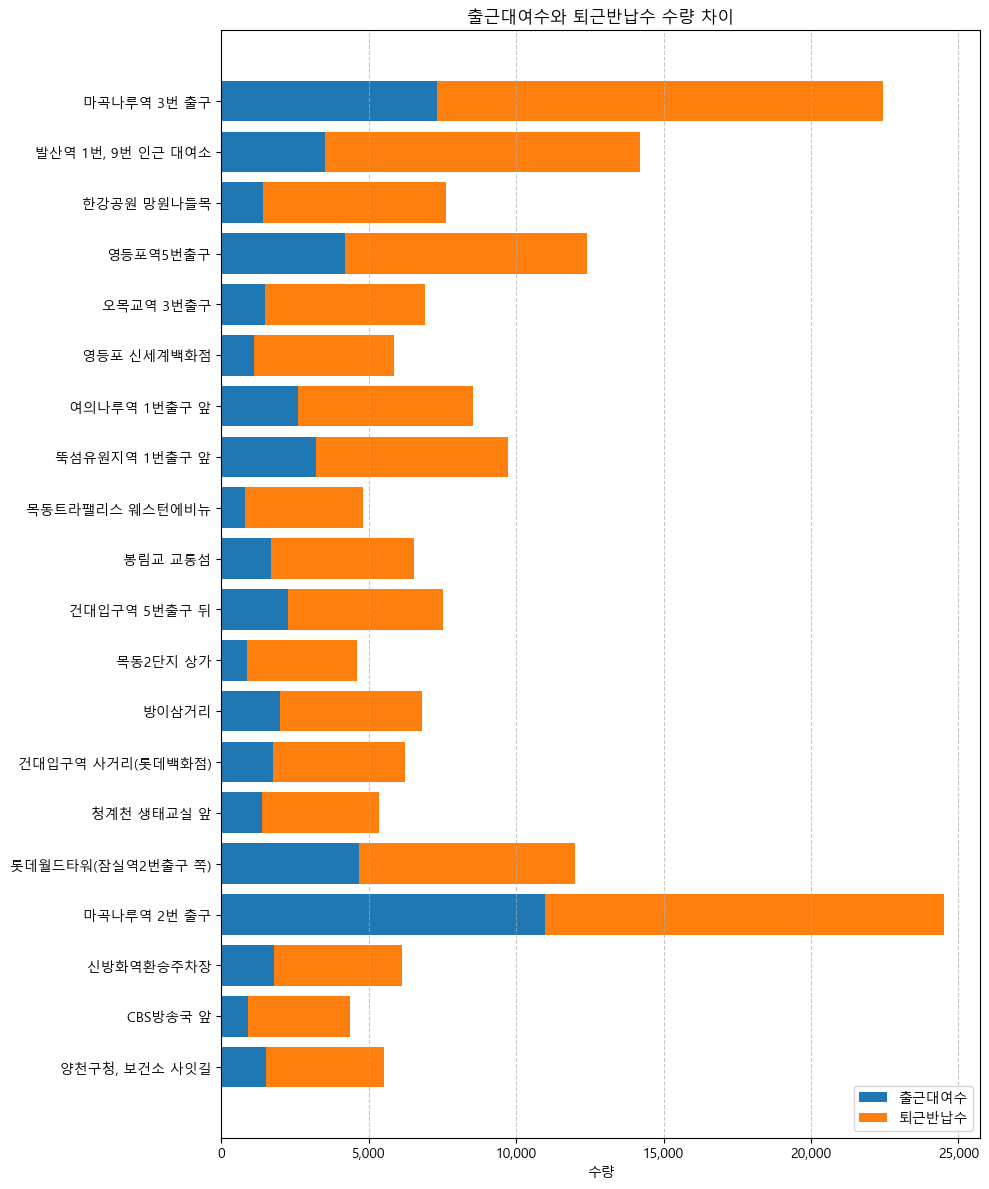

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성 (가로 세로 비율 조정)
fig, ax = plt.subplots(figsize=(10, 12))

# 데이터 정렬 (선택사항: 그래프를 보기 좋게 정렬)
top_20_sorted = top_20.sort_values('퇴근반납수-출근대여수', ascending=True)

# 첫 번째 컬럼으로 수평 막대 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], label='출근대여수')

# 두 번째 컬럼을 첫 번째 컬럼 옆에 누적하여 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], 
        left=top_20_sorted['출근대여수'], label='퇴근반납수')

# 그래프 스타일링
ax.set_xlabel('수량')
ax.set_title('출근대여수와 퇴근반납수 수량 차이')
ax.legend(loc='lower right')

# y축 레이블 정렬
plt.yticks(rotation=0, ha='right')

# x축에 천 단위 구분자 추가
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 그리드 추가 (선택사항)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

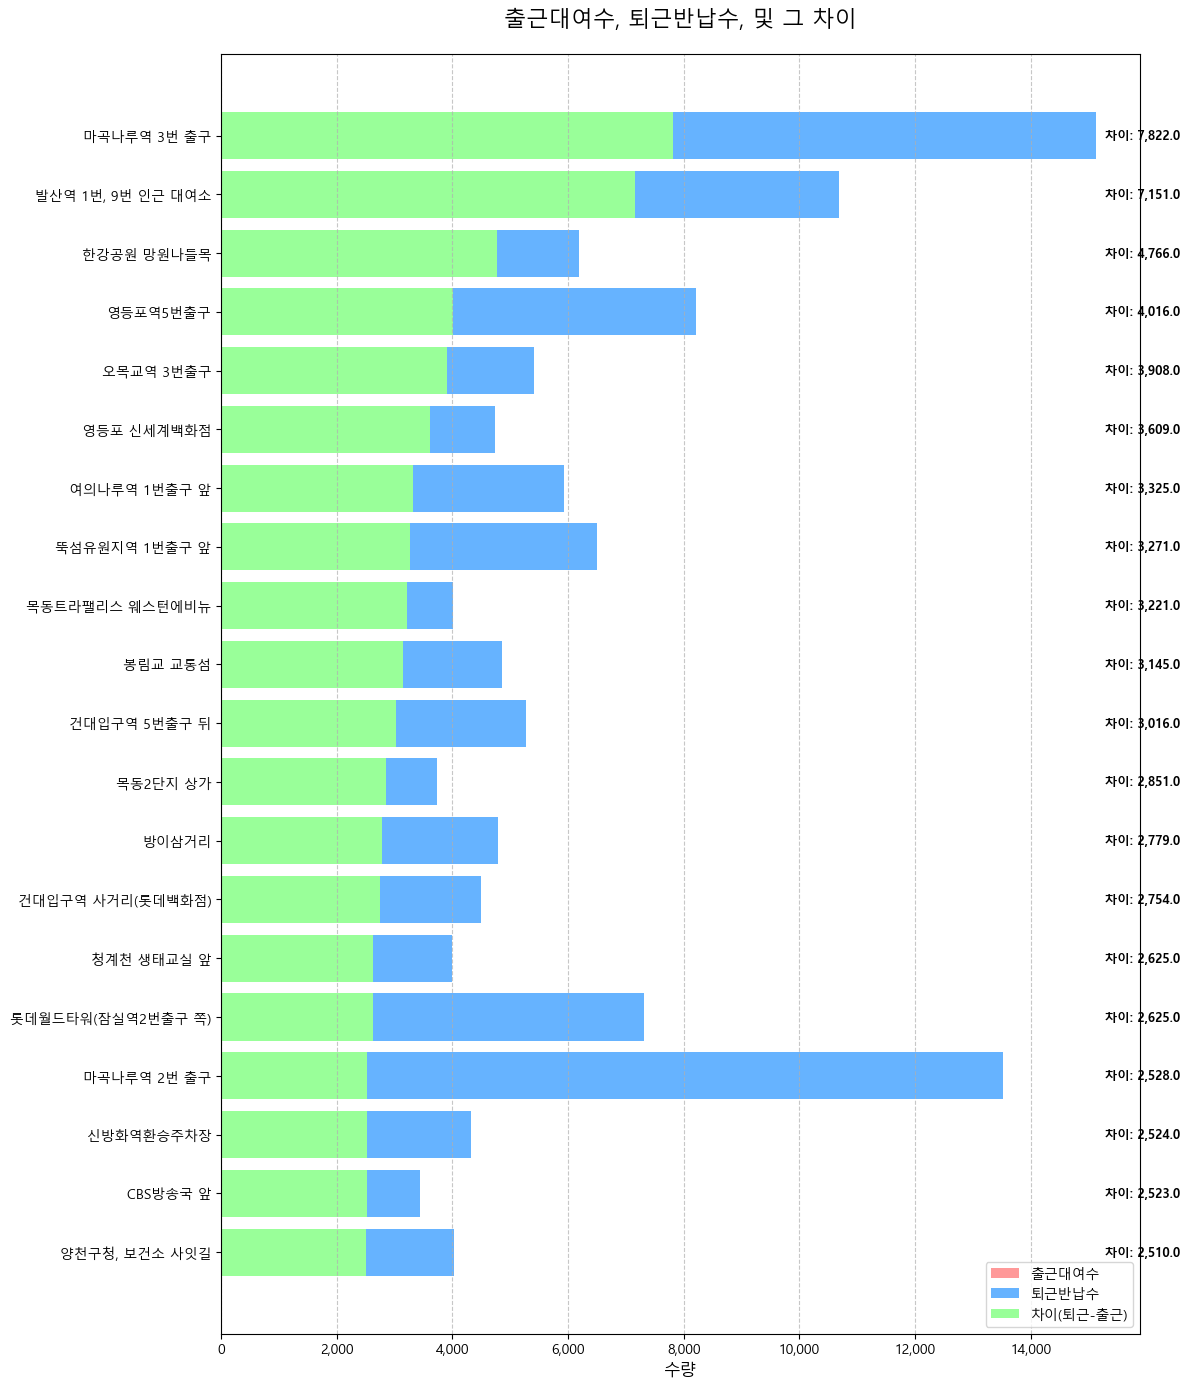

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성 (가로 세로 비율 조정)
fig, ax = plt.subplots(figsize=(12, 14))

# 데이터 정렬 및 차이 계산
top_20_sorted = top_20.sort_values('퇴근반납수-출근대여수', ascending=True)
top_20_sorted['차이'] = top_20_sorted['퇴근반납수'] - top_20_sorted['출근대여수']

# 색상 설정
colors = ['#ff9999', '#66b3ff', '#99ff99']

# 막대 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], label='출근대여수', color=colors[0])
ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], label='퇴근반납수', color=colors[1])
ax.barh(top_20_sorted['대여소명'], top_20_sorted['차이'], label='차이(퇴근-출근)', color=colors[2])

# 그래프 스타일링
ax.set_xlabel('수량', fontsize=12)
ax.set_title('출근대여수, 퇴근반납수, 및 그 차이', fontsize=16, pad=20)
ax.legend(loc='lower right', fontsize=10)

# y축 레이블 정렬
plt.yticks(rotation=0, ha='right')

# x축에 천 단위 구분자 추가
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 차이 값 표시
for i, value in enumerate(top_20_sorted['차이']):
    ax.text(max(top_20_sorted['퇴근반납수']), i, f'  차이: {value:,}', 
            va='center', ha='left', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

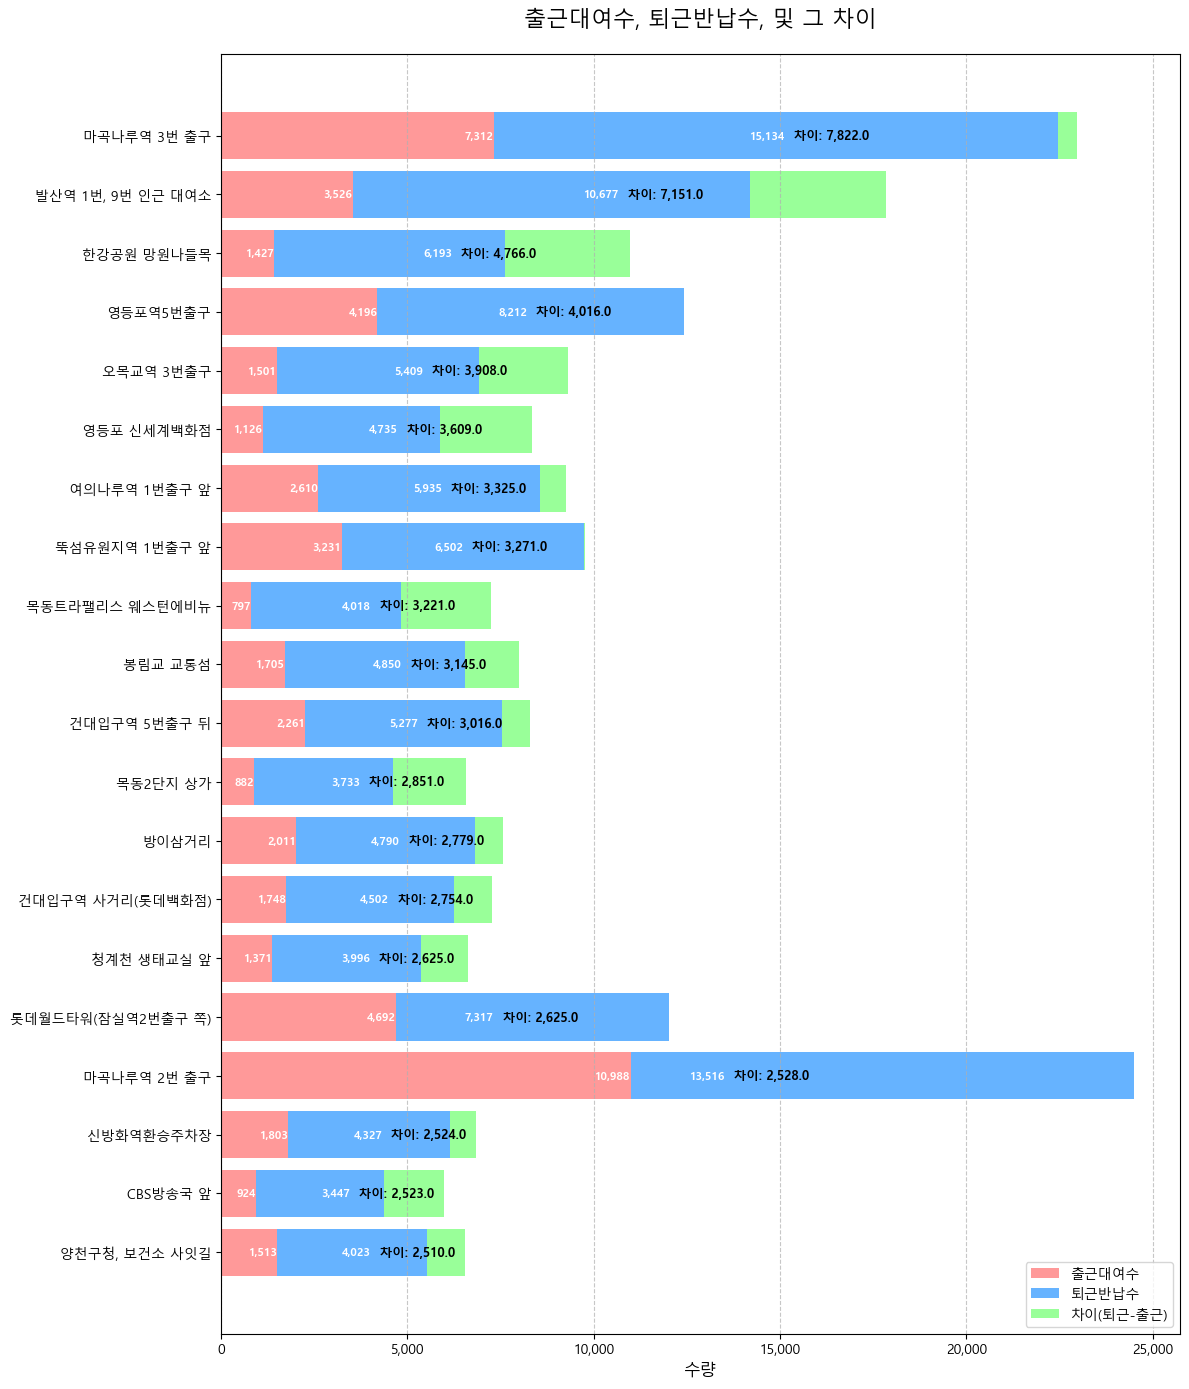

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성 (가로 세로 비율 조정)
fig, ax = plt.subplots(figsize=(12, 14))

# 데이터 정렬 및 차이 계산
top_20_sorted = top_20.sort_values('퇴근반납수-출근대여수', ascending=True)
top_20_sorted['차이'] = top_20_sorted['퇴근반납수'] - top_20_sorted['출근대여수']

# 색상 설정
colors = ['#ff9999', '#66b3ff', '#99ff99']

# 막대 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], label='출근대여수', color=colors[0])
ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], label='퇴근반납수', color=colors[1])

# 차이 막대 그리기 (양수인 경우에만)
positive_diff = top_20_sorted['차이'].clip(lower=0)
ax.barh(top_20_sorted['대여소명'], positive_diff, left=top_20_sorted[['출근대여수', '퇴근반납수']].max(axis=1), label='차이(퇴근-출근)', color=colors[2])

# 그래프 스타일링
ax.set_xlabel('수량', fontsize=12)
ax.set_title('출근대여수, 퇴근반납수, 및 그 차이', fontsize=16, pad=20)
ax.legend(loc='lower right', fontsize=10)

# y축 레이블 정렬
plt.yticks(rotation=0, ha='right')

# x축에 천 단위 구분자 추가
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 차이 값 표시
for i, (value, total) in enumerate(zip(top_20_sorted['차이'], top_20_sorted[['출근대여수', '퇴근반납수']].max(axis=1))):
    ax.text(total, i, f'  차이: {value:,}', 
            va='center', ha='left', fontweight='bold', fontsize=9)

# 각 막대에 값 표시
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}',
                ha='right', va='center', fontweight='bold', fontsize=8, color='white')

bars1 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], color=colors[0])
bars2 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], color=colors[1])

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

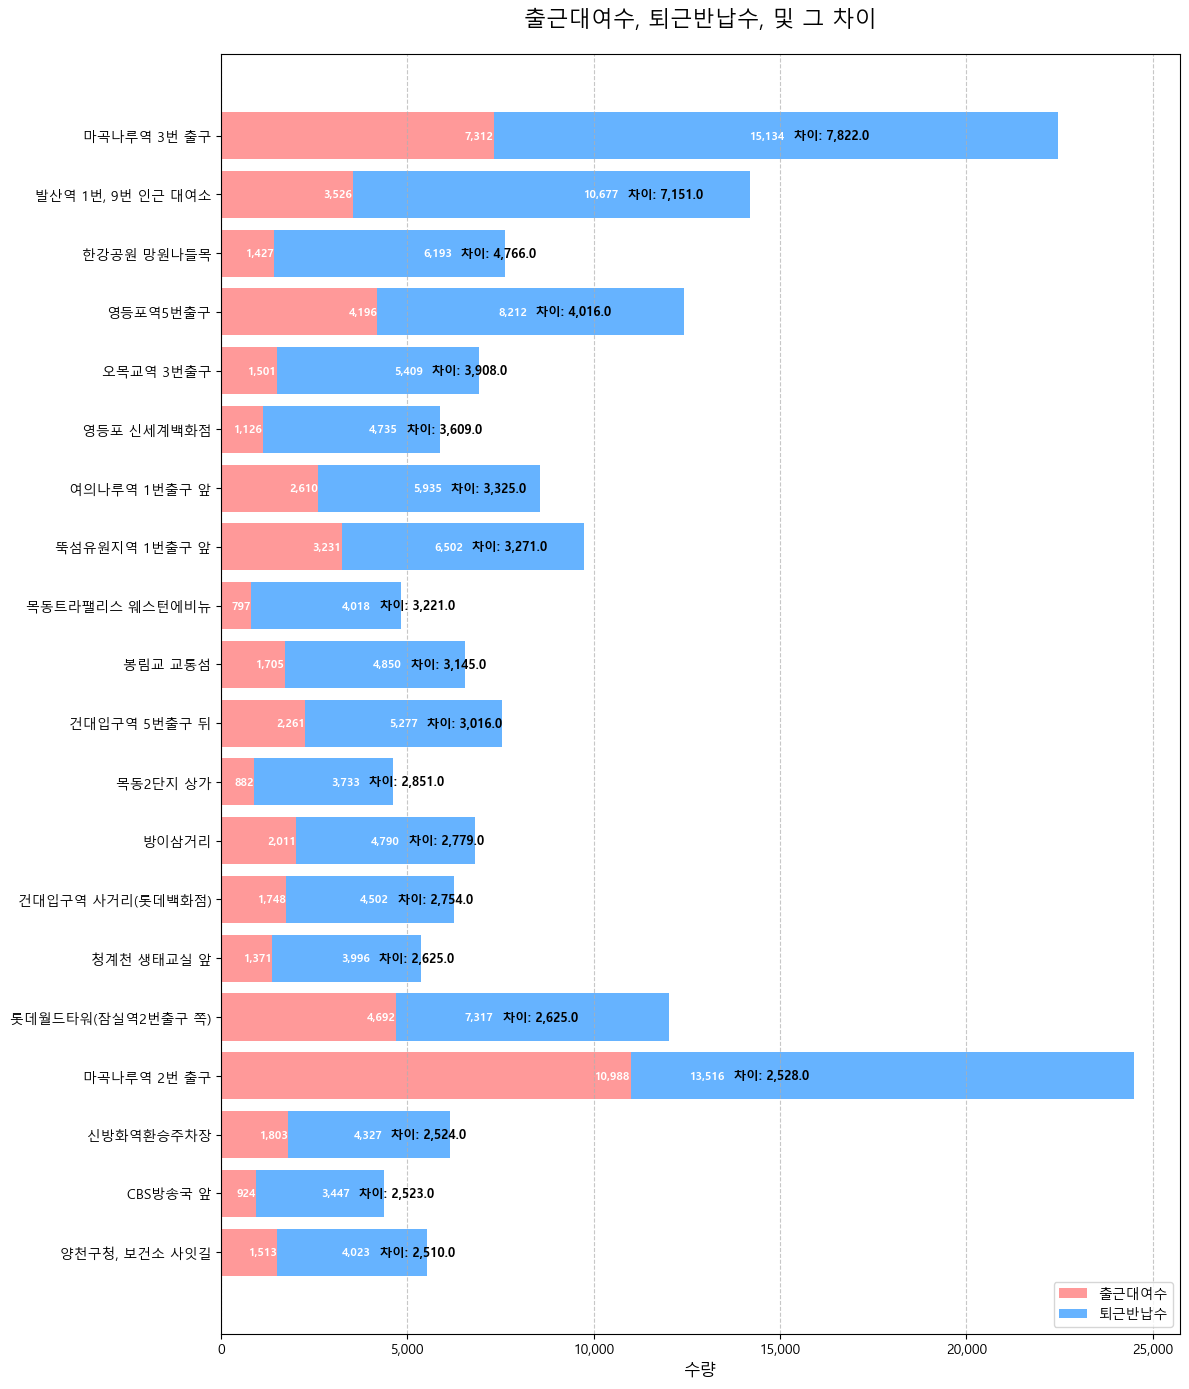

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성 (가로 세로 비율 조정)
fig, ax = plt.subplots(figsize=(12, 14))

# 데이터 정렬 및 차이 계산
top_20_sorted = top_20.sort_values('퇴근반납수-출근대여수', ascending=True)
top_20_sorted['차이'] = top_20_sorted['퇴근반납수'] - top_20_sorted['출근대여수']

# 색상 설정
colors = ['#ff9999', '#66b3ff']

# 막대 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], label='출근대여수', color=colors[0])
ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], label='퇴근반납수', color=colors[1])

# 그래프 스타일링
ax.set_xlabel('수량', fontsize=12)
ax.set_title('출근대여수, 퇴근반납수, 및 그 차이', fontsize=16, pad=20)
ax.legend(loc='lower right', fontsize=10)

# y축 레이블 정렬
plt.yticks(rotation=0, ha='right')

# x축에 천 단위 구분자 추가
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 차이 값 표시
for i, (value, total) in enumerate(zip(top_20_sorted['차이'], top_20_sorted[['출근대여수', '퇴근반납수']].max(axis=1))):
    ax.text(total, i, f'  차이: {value:,}', 
            va='center', ha='left', fontweight='bold', fontsize=9)

# 각 막대에 값 표시
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}',
                ha='right', va='center', fontweight='bold', fontsize=8, color='white')

bars1 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], color=colors[0])
bars2 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], color=colors[1])

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

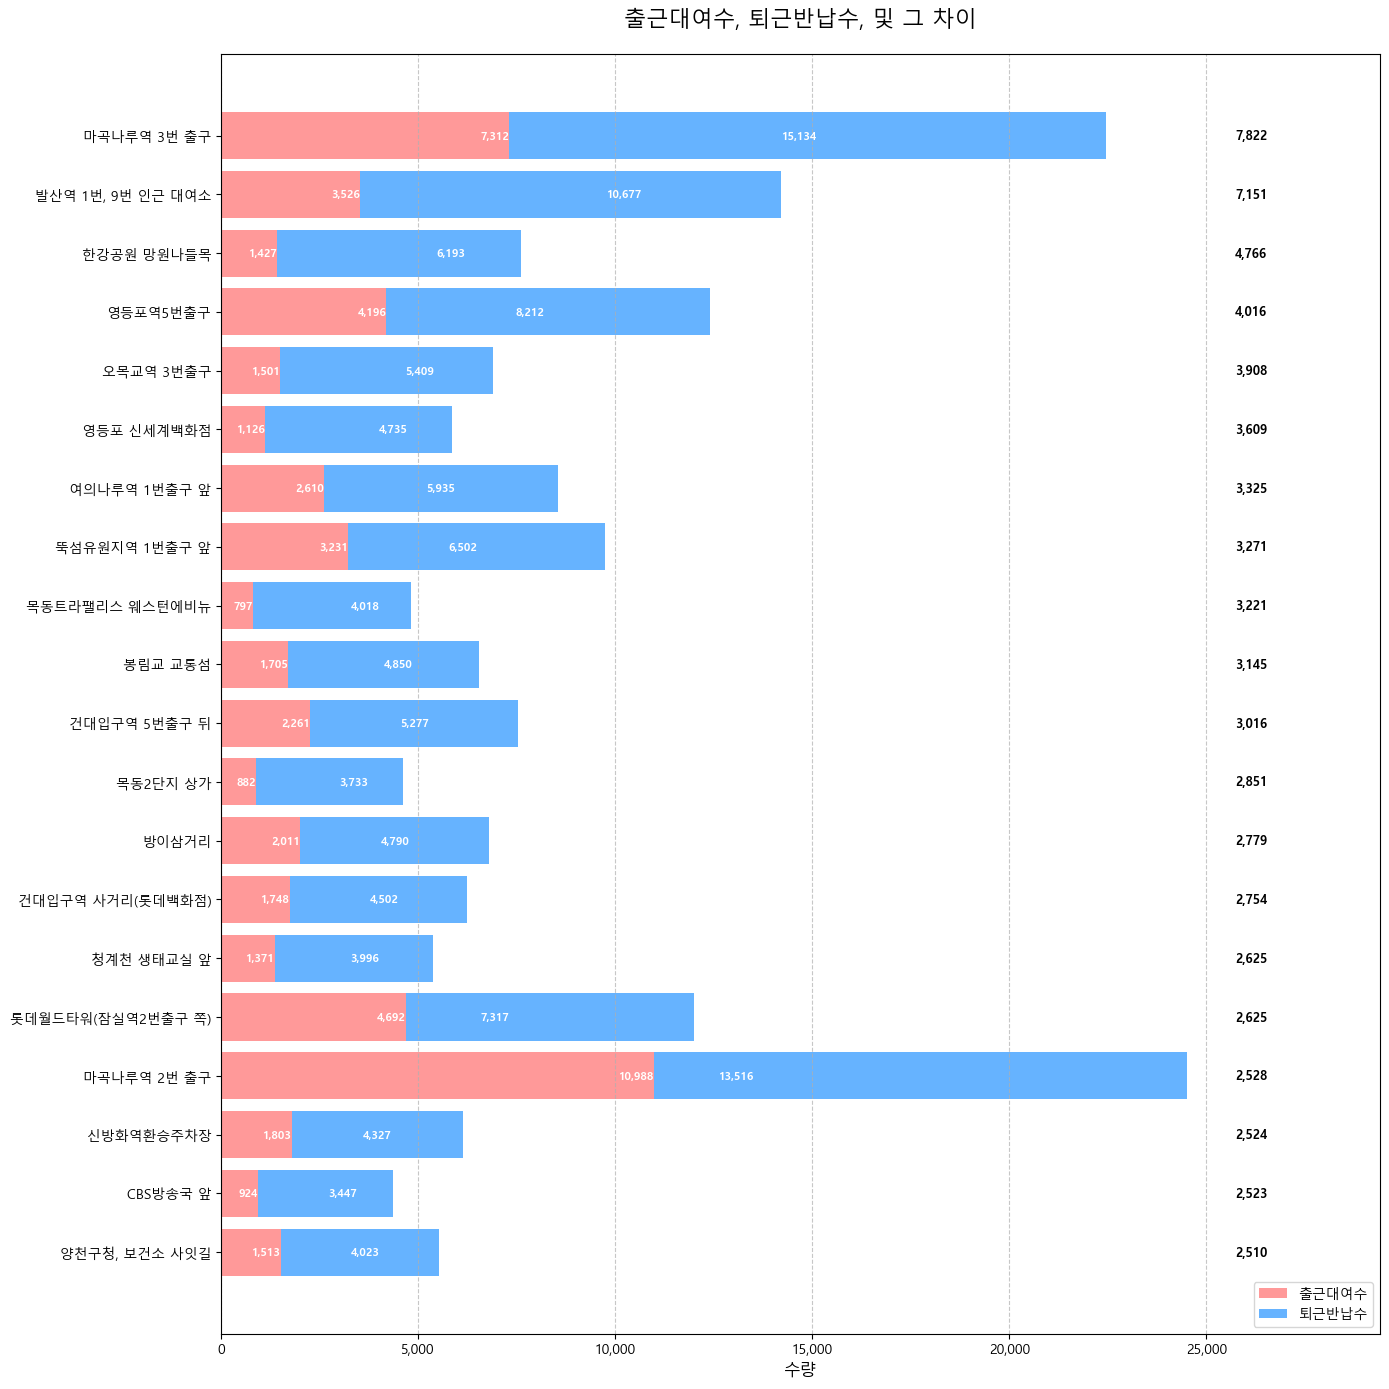

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성 (가로 세로 비율 조정)
fig, ax = plt.subplots(figsize=(14, 14))  # 가로 길이를 늘림

# 데이터 정렬 및 차이 계산
top_20_sorted = top_20.sort_values('퇴근반납수-출근대여수', ascending=True)
top_20_sorted['차이'] = top_20_sorted['퇴근반납수'] - top_20_sorted['출근대여수']

# 색상 설정
colors = ['#ff9999', '#66b3ff']

# 막대 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], label='출근대여수', color=colors[0])
ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], label='퇴근반납수', color=colors[1])

# 그래프 스타일링
ax.set_xlabel('수량', fontsize=12)
ax.set_title('출근대여수, 퇴근반납수, 및 그 차이', fontsize=16, pad=20)
ax.legend(loc='lower right', fontsize=10)

# y축 레이블 정렬
plt.yticks(rotation=0, ha='right')

# x축에 천 단위 구분자 추가
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 각 막대에 값 표시
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}',
                ha='right', va='center', fontweight='bold', fontsize=8, color='white')

bars1 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], color=colors[0])
bars2 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], color=colors[1])

add_value_labels(bars1)
add_value_labels(bars2)

# 차이 값 표시 (가장 오른쪽에)
max_value = top_20_sorted[['출근대여수', '퇴근반납수']].sum(axis=1).max()
for i, value in enumerate(top_20_sorted['차이']):
    ax.text(max_value * 1.05, i, f'{int(value):,}', 
            va='center', ha='left', fontweight='bold', fontsize=9)

# x축 범위 조정
ax.set_xlim(0, max_value * 1.2)

plt.tight_layout()
plt.show()